## 가설 4 
# 같은 판매자로부터 여러 번 구매한 고객은 해당 판매자의 다른 제품에도 관심을 가질 것이다.(재선)

In [136]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [137]:
items = pd.read_csv('olist_order_items_dataset.csv')
order = pd.read_csv('olist_orders_dataset.csv')
customer = pd.read_csv('olist_customers_dataset.csv')
product = pd.read_csv('updated_olist_products_dataset.csv') # 번역버전

In [138]:
items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [139]:
order.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [140]:
customer.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [141]:
product.head()

,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


# 결측 확인하기

items

In [142]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [143]:
items.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [144]:
items[items['order_id'] == '8272b63d03f5f79c56e9e4120aec44ef']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
57297,8272b63d03f5f79c56e9e4120aec44ef,1,270516a3f41dc035aa87d220228f844c,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57298,8272b63d03f5f79c56e9e4120aec44ef,2,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57299,8272b63d03f5f79c56e9e4120aec44ef,3,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57300,8272b63d03f5f79c56e9e4120aec44ef,4,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57301,8272b63d03f5f79c56e9e4120aec44ef,5,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57302,8272b63d03f5f79c56e9e4120aec44ef,6,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57303,8272b63d03f5f79c56e9e4120aec44ef,7,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57304,8272b63d03f5f79c56e9e4120aec44ef,8,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57305,8272b63d03f5f79c56e9e4120aec44ef,9,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57306,8272b63d03f5f79c56e9e4120aec44ef,10,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89


In [145]:
items['price'].sort_values().tail(15)

93516     3700.00
69142     3899.00
28884     3930.00
67456     3980.00
56663     3999.00
59137     3999.90
78310     4059.00
45843     4099.99
29193     4399.87
62086     4590.00
11249     4690.00
74336     4799.00
107841    6499.00
112233    6729.00
3556      6735.00
Name: price, dtype: float64

In [146]:
items.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [147]:
items.duplicated().sum()

0

product

In [148]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_name_lenght         32341 non-null  float64
 2   product_description_lenght  32341 non-null  float64
 3   product_photos_qty          32341 non-null  float64
 4   product_weight_g            32949 non-null  float64
 5   product_length_cm           32949 non-null  float64
 6   product_height_cm           32949 non-null  float64
 7   product_width_cm            32949 non-null  float64
 8   product_category_name       32328 non-null  object 
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [149]:
product.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [150]:
product.isna().sum()

product_id                      0
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
product_category_name         623
dtype: int64

In [151]:
product.duplicated().sum()

0

customer

In [152]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [153]:
customer.describe(include='object')

,customer_id,customer_unique_id,customer_city,customer_state
count,99441,99441,99441,99441
unique,99441,96096,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,sao paulo,SP
freq,1,17,15540,41746


In [154]:
customer.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [155]:
customer.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [156]:
customer.duplicated().sum()

0

order

In [157]:
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [158]:
order.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [159]:
order.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [160]:
order.duplicated().sum()

0

# 결측치 제거
Product만 제거하기  
카테고리를 오브젝트로 채워주기엔 가설에 영향을 줄 수 있다.

order에서도 결측치가 발견됐지만 카드승인,배송준비로인해 타당한 결과라고 보며 이후에 사용하지 않을 예정이기 때문에 냅둔다.

In [161]:
# 카테고리 결측지 전부제거 623 + 1 행
# 무게 부분도 1개로 지워버리자 but? 사용하지 않을 껀데 애꿎은 행 하나만 지운거 아닐까?

product = product.dropna(subset=['product_category_name','product_weight_g'])

In [162]:
product.isna().sum()

product_id                    0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
product_category_name         0
dtype: int64

# 병합

In [163]:
orders_customers = order.merge(customer, on="customer_id", how="left")

In [164]:
orders_customers

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP
...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ


In [165]:
order_item_customer = items.merge(orders_customers, on="order_id", how="right")

In [166]:
order_item_customer

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113420,63943bddc261676b46f01ca7ac2f7bd8,1.0,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP
113421,83c1379a015df1e13d02aae0204711ab,1.0,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA
113422,11c177c8e97725db2631073c19f07b62,1.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ
113423,11c177c8e97725db2631073c19f07b62,2.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ


In [167]:
total_merge = order_item_customer.merge(product, on="product_id", how="left")

In [168]:
total_merge

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,customer_city,customer_state,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name
0,e481f51cbdc54678b7cc49136f2d6af7,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,...,sao paulo,SP,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
1,53cdb2fc8bc7dce0b6741e2150273451,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,...,barreiras,BA,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumery
2,47770eb9100c2d0c44946d9cf07ec65d,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,...,vianopolis,GO,46.0,232.0,1.0,420.0,24.0,19.0,21.0,auto
3,949d5b44dbf5de918fe9c16f97b45f8a,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,...,sao goncalo do amarante,RN,59.0,468.0,3.0,450.0,30.0,10.0,20.0,pet_shop
4,ad21c59c0840e6cb83a9ceb5573f8159,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,...,santo andre,SP,38.0,316.0,4.0,250.0,51.0,15.0,15.0,stationery
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113420,63943bddc261676b46f01ca7ac2f7bd8,1.0,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,...,praia grande,SP,52.0,828.0,4.0,4950.0,40.0,10.0,40.0,baby
113421,83c1379a015df1e13d02aae0204711ab,1.0,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,...,nova vicosa,BA,51.0,500.0,2.0,13300.0,32.0,90.0,22.0,home_appliances_2
113422,11c177c8e97725db2631073c19f07b62,1.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,...,japuiba,RJ,59.0,1893.0,1.0,6550.0,20.0,20.0,20.0,computers_accessories
113423,11c177c8e97725db2631073c19f07b62,2.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,...,japuiba,RJ,59.0,1893.0,1.0,6550.0,20.0,20.0,20.0,computers_accessories


In [169]:
total_merge.to_csv('1_merged.csv',index=False)

# 병합 후 결측치 확인

In [170]:
number4 = total_merge[['order_id',
'seller_id',
'product_id',
'customer_unique_id',
'product_category_name']]

In [171]:
number4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113425 entries, 0 to 113424
Data columns (total 5 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   order_id               113425 non-null  object
 1   seller_id              112650 non-null  object
 2   product_id             112650 non-null  object
 3   customer_unique_id     113425 non-null  object
 4   product_category_name  111022 non-null  object
dtypes: object(5)
memory usage: 4.3+ MB


In [172]:
number4.describe()

,order_id,seller_id,product_id,customer_unique_id,product_category_name
count,113425,112650,112650,113425,111022
unique,99441,3095,32951,96096,71
top,8272b63d03f5f79c56e9e4120aec44ef,6560211a19b47992c3666cc44a7e94c0,aca2eb7d00ea1a7b8ebd4e68314663af,c8460e4251689ba205045f3ea17884a1,bed_bath_table
freq,21,2033,527,24,11115


In [173]:
number4.isna().mean()

order_id                 0.000000
seller_id                0.006833
product_id               0.006833
customer_unique_id       0.000000
product_category_name    0.021186
dtype: float64

In [174]:
number4.isna().sum()

order_id                    0
seller_id                 775
product_id                775
customer_unique_id          0
product_category_name    2403
dtype: int64

# 결측치 제거
약 2퍼센트로 삭제하고 진행해보자[사소하다]

삭제 이유 
seller_id의 경우 가설이 같은 판매자이기 때문에 임의의 값을 채워준다면 결과값이 달라질 수 있다.

[같은 판매자로부터 여러 번 구매한 고객은 해당 판매자의 다른 제품에도 관심을 가질 것이다.]  

판매자를 임의로 선정한다면 가설에 영향을 준다고 판단했다.

In [175]:
number4_drop = number4.dropna(subset=['seller_id','product_category_name'])

In [176]:
number4_drop.isna().mean()

order_id                 0.0
seller_id                0.0
product_id               0.0
customer_unique_id       0.0
product_category_name    0.0
dtype: float64

# 반복구매자 정의하고 구해보기  
order_id가 중복이 아닌 건들에 대해서

In [177]:
#유저당 평균 구매 횟수
#단 1.03회.
#반복구매자의 정의는 1.03보다 높은 2회로 가정하겠다.
number4_drop.groupby("customer_unique_id")["order_id"].nunique().mean()

1.0336709641076876

# 2회 이상으로 T/F 로 나누기

In [178]:

# customer_unique_id 기준으로 서로 다른 order_id 개수 계산
customer_order_counts = number4_drop.groupby("customer_unique_id")["order_id"].nunique().reset_index()
customer_order_counts.rename(columns={"order_id": "order_count"}, inplace=True)

# 2회 이상 주문한 고객 필터링
multi_order_customers = customer_order_counts[customer_order_counts["order_count"] >= 2]

# 2회 이상 주문한 고객 수
multi_order_customer_count = len(multi_order_customers)
multi_order_customer_count

2849

In [179]:
over_2_customers = customer_order_counts[customer_order_counts["order_count"] >= 2]["customer_unique_id"]

In [180]:
number4_drop["over_2_customers"] = number4_drop["customer_unique_id"].isin(over_2_customers)


/var/folders/00/7tbqj90j5ys5m58gf_w8rjfr0000gn/T/ipykernel_29081/46834807.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  number4_drop["over_2_customers"] = number4_drop["customer_unique_id"].isin(over_2_customers)


In [181]:
number4_drop[number4_drop["over_2_customers"] == True]["customer_unique_id"].nunique()

2849

In [182]:
# 2회 이상으로 연속형 데이터 컬럼으로 저장하기
number4_drop = number4_drop.merge(customer_order_counts, on="customer_unique_id", how="left")


# 같은 판매자로부터 2번 이상 구매한 유니크고객을 골라내기
order_id가 중복이 아닌 건들에 대해서

In [183]:
repeat_seller = number4_drop.groupby(["customer_unique_id", "seller_id"])["order_id"].nunique()

In [184]:
repeat_seller_customers = repeat_seller[repeat_seller >= 2].index

In [185]:
number4_drop["repeat_seller"] = number4_drop.set_index(["customer_unique_id", "seller_id"]).index.isin(repeat_seller_customers)

In [186]:
number4_drop[number4_drop["repeat_seller"] == True]["customer_unique_id"].nunique()

890

연속형

In [187]:
number4_drop["repeat_seller_count"] = number4_drop.set_index(["customer_unique_id", "seller_id"]).index.map(repeat_seller)


# 고객-판매자별 구매한 제품 카테고리 개수 계산

In [188]:
# 고객-판매자별 구매한 제품 카테고리 개수 계산
customer_seller_category = number4_drop.groupby(["customer_unique_id", "seller_id"])["product_category_name"].nunique().reset_index()
customer_seller_category.rename(columns={"product_category_name": "category_count"}, inplace=True)


# 기존 데이터프레임(number4_drop)에 병합 (데이터 유지)
number4_drop = number4_drop.merge(customer_seller_category, on=["customer_unique_id", "seller_id"], how="left")

# NaN 값 처리 및 정수 변환
number4_drop["category_count"] = number4_drop["category_count"].fillna(1).astype(int)

# 2개 이상의 카테고리를 구매한 경우 True, 1개만 구매한 경우 False
number4_drop["multi_category_buyer"] = number4_drop["category_count"] >= 2

# `category_count` 컬럼 삭제
number4_drop.drop(columns=["category_count"], inplace=True)

# 결과 확인
print(number4_drop.head(5))

                           order_id                         seller_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  3504c0cb71d7fa48d967e0e4c94d59d9   
1  53cdb2fc8bc7dce0b6741e2150273451  289cdb325fb7e7f891c38608bf9e0962   
2  47770eb9100c2d0c44946d9cf07ec65d  4869f7a5dfa277a7dca6462dcf3b52b2   
3  949d5b44dbf5de918fe9c16f97b45f8a  66922902710d126a0e7d26b0e3805106   
4  ad21c59c0840e6cb83a9ceb5573f8159  2c9e548be18521d1c43cde1c582c6de8   

                         product_id                customer_unique_id  \
0  87285b34884572647811a353c7ac498a  7c396fd4830fd04220f754e42b4e5bff   
1  595fac2a385ac33a80bd5114aec74eb8  af07308b275d755c9edb36a90c618231   
2  aa4383b373c6aca5d8797843e5594415  3a653a41f6f9fc3d2a113cf8398680e8   
3  d0b61bfb1de832b15ba9d266ca96e5b0  7c142cf63193a1473d2e66489a9ae977   
4  65266b2da20d04dbe00c5c2d3bb7859e  72632f0f9dd73dfee390c9b22eb56dd6   

  product_category_name  over_2_customers  order_count  repeat_seller  \
0            housewares              True        

# 연속형


In [189]:
number4_drop = number4_drop.merge(customer_seller_category, on=["customer_unique_id", "seller_id"], how="left")

# 상관관계를 분석 해볼까?


In [190]:
# 이진 변수들만 포함한 데이터프레임 생성
binary_corr_df = number4_drop[["over_2_customers", "repeat_seller", "multi_category_buyer"]].astype(int)

# 상관관계 행렬 계산
correlation_matrix = binary_corr_df.corr()

# 출력
print(correlation_matrix)

                      over_2_customers  repeat_seller  multi_category_buyer
over_2_customers              1.000000       0.547972              0.088432
repeat_seller                 0.547972       1.000000              0.141086
multi_category_buyer          0.088432       0.141086              1.000000


해석 (간단하게)  
over_2_customers ↔ repeat_seller (0.547)
상관관계 높음 (양의 관계) → 반복 구매 고객(over_2_customers)은 같은 판매자로부터 재구매할 가능성이 높음.

repeat_seller ↔ multi_category_buyer (0.141)
약한 양의 관계 → 같은 판매자로부터 여러 번 구매한 고객이 다양한 카테고리도 구매할 가능성이 조금 더 높음.

over_2_customers ↔ multi_category_buyer (0.088)
거의 상관관계 없음 → 반복 구매 자체(over_2_customers)가 다양한 카테고리 구매(multi_category_buyer)와 직접적인 연관이 크지 않음.


0.00 ~ 0.10	거의 무관 (매우 약한 관계)  
0.10 ~ 0.30	약한 관계 (연관은 있지만 강하지 않음)  
0.30 ~ 0.50	중간 정도의 관계  
0.50 ~ 0.70	강한 관계  
0.70 ~ 1.00	매우 강한 관계  

✔ over_2_customers ↔ repeat_seller → 강한 관계 (연관성이 크다, 50% 이상 영향 가능)  
✔ repeat_seller ↔ multi_category_buyer → 약한 관계 (연관이 있지만 크지 않다, 10~15% 정도 영향)  
✔ over_2_customers ↔ multi_category_buyer → 거의 무관 (연관성이 매우 낮음, 5~10% 미만)  

In [191]:
import matplotlib.pyplot as plt
import matplotlib as mpl


mpl.rc('font', family='AppleGothic')

# 마이너스(-) 기호가 깨지는 문제 해결
mpl.rcParams['axes.unicode_minus'] = False

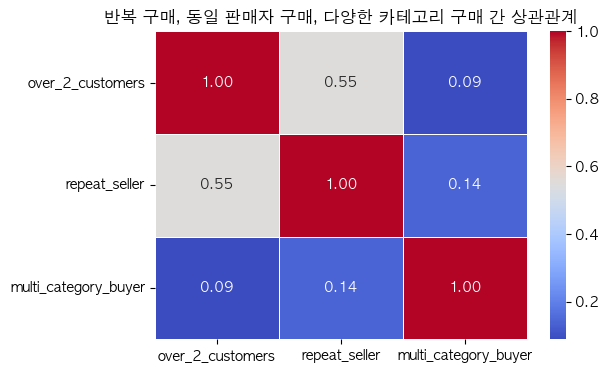

In [192]:
import numpy as np

# 상관관계 행렬 계산
corr_matrix = number4_drop[["over_2_customers", "repeat_seller", "multi_category_buyer"]].corr()

# 히트맵 시각화
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("반복 구매, 동일 판매자 구매, 다양한 카테고리 구매 간 상관관계")
plt.show()


In [193]:
# 연속형 변수들만 포함한 데이터프레임 생성
continuous_corr = number4_drop[["order_count", "repeat_seller_count", "category_count"]]

# 상관관계 행렬 계산
continuous_correlation_matrix = continuous_corr.corr()

# 출력
print(continuous_correlation_matrix)



                     order_count  repeat_seller_count  category_count
order_count             1.000000             0.536117        0.137769
repeat_seller_count     0.536117             1.000000        0.220523
category_count          0.137769             0.220523        1.000000


해석  

order_count ↔ repeat_seller_count	  
0.536   유의미한 관계 (중간 정도의 양의 상관관계)    
order_count ↔ category_count  
0.138	상관관계 거의 없음 (약한 양의 관계)  
repeat_seller_count ↔ category_count  
0.221	약한 관계 (약한 양의 상관관계) 

결론  
order_count와 repeat_seller_count는 연관이 있음  
→ 고객이 주문을 많이 할수록 동일 판매자로부터 반복 구매하는 경향이 있음  
repeat_seller_count와 category_count는 약한 상관관계  
→ 동일 판매자로부터 많이 구매한다고 해서 반드시 다양한 카테고리를 구매하는 것은 아님  
order_count와 category_count는 거의 무관  
→ 고객이 주문을 많이 해도 다양한 카테고리를 구매하는 것과는 직접적인 관련이 없음  

# 회귀분석을 진행해볼까 ?

In [194]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 종속 변수(y): 2개 이상 카테고리 구매 여부
y = number4_drop["multi_category_buyer"]

# 독립 변수(X): 전체 주문 횟수 + 동일 판매자 구매 횟수 + 기존 이진 변수들
X = number4_drop[["order_count", "repeat_seller_count", "over_2_customers", "repeat_seller"]]

# 훈련/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 모델 학습
model = LogisticRegression()
model.fit(X_train, y_train)

# 예측 수행
y_pred = model.predict(X_test)

# 모델 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"정확도: {accuracy:.4f}")
print("회귀 계수:", model.coef_)
print("절편:", model.intercept_)

정확도: 0.9953
회귀 계수: [[0.25777118 0.60728053 0.17965802 1.82578974]]
절편: [-6.58607953]


정확도 : 과적합가능성있음

회귀 계수  
order_count → 0.2578  
→ 전체 주문 횟수가 1 증가하면 multi_category_buyer(다양한 카테고리 구매할 확률) 증가  
repeat_seller_count → 0.6073  
 → 동일 판매자로부터 추가 구매할수록 multi_category_buyer일 확률이 더 증가  
over_2_customers → 0.1797  
 → 2회 이상 구매한 고객일 경우 multi_category_buyer 확률 증가
repeat_seller → 1.8258 (가장 큰 값)  
 → 동일 판매자로부터 2회 이상 구매한 고객은  multi_category_buyer가 될 확률이 크게 증가  

절편 (Intercept) = -6.5861   
→ 모든 독립 변수가 0일 때, multi_category_buyer가 될 확률이 매우 낮음 (e^(-6.586) ≈ 0.0014)  
[이건 당연한 결과이기 떄문에 해석을할 필요가 없다] 구매가 0이면 카테고리가 없는게 당연하다.  

repeat_seller가 가장 큰 영향력 → 동일 판매자로부터 재구매하면 다양한 카테고리에서 구매할 확률이 급격히 증가  
repeat_seller_count도 강한 영향 → 동일 판매자에게서 많이 구매할수록 다양한 카테고리 구매 확률 증가  

But 같은 판매자의 다른 카테고리 제품을 산다는건 근거로 채택하기 어렵다.  
동일 판매자로부터 2번 이상 구매한 고객은 다른 판매자 or 같은판매자에게서 다른 카테고리를 구매 할 확률이 높아지는 건 사실

기각기각기각기각

In [195]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 독립 변수(X)와 종속 변수(y) 설정
X = number4_drop[["order_count", "repeat_seller_count"]]
y = number4_drop["category_count"]  # 연속형 변수

# 훈련/테스트 데이터 분할 (80% 훈련, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 예측 수행
y_pred = model.predict(X_test)

# 모델 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.4f}, R²: {r2:.4f}")  # 낮을수록 좋음
print("회귀 계수:", model.coef_)  # 변수별 영향도
print("절편:", model.intercept_)  # y 절편


MSE: 0.0042, R²: 0.0559
회귀 계수: [0.00417919 0.08668875]
절편: 0.9118822304511665


MSE = 0.0042 낮을 수록 좋다.  
R^2 = 0.0559 설명력이 낮다.  
→ order_count와 repeat_seller_count가 category_count를 설명하지 못한다.  

회귀 계수  
order_count → 0.0042  → 고객이 1회 주문 증가할 때, 평균적으로 category_count가 0.0042 증가  
repeat_seller_count → 0.0867  → 동일 판매자로부터 1회 추가 구매할 때, 평균적으로 category_count가 0.0867 증가  

절편 (Intercept) = 0.9119  
→ 독립 변수(X)가 0일 때, category_count의 예상값은 0.9119
[이것도 당연한 결과이다]  

추가변수가 더 필요하다.  
예측보다는 변수 간 관계 분석용도로 적합하다.  

기각기각기각기각


# 추가 가설을 증명해보자 
2번 이상 구매한 고객은 같은 판매자에게서 구매할 확률이 높다

In [196]:
# 2회 이상 구매한 고객들 중에서 T/T값을 찾아보자
filter_g1 = number4_drop[number4_drop["over_2_customers"] == True]
filter_g1["repeat_seller"].value_counts(normalize=True)

repeat_seller
False    0.685218
True     0.314782
Name: proportion, dtype: float64

해석 

2번이이상 구매한 고객중 31.5%가 동일 판매자로부터 2회 이상 구매 하였으며, over_2_customers와 repeat_seller가 0.54의 상관계수를 가지고 있어 두번째 가설은 맞다고 볼 수 있다.

2번 이상 구매한 고객은 동일 판매자로부터 재구매할 확률이 높지만, 전부는 아님  
약 31.5%의 고객이 동일 판매자로부터 재구매 → 특정 충성 고객층이 존재  
상관계수 0.55로, 비교적 강한 관계를 보이지만 절대적인 관계는 아님   

In [197]:
# 2번 이상 구매한 고객 중 동일 판매자로부터 2회 이상 구매한 비율 계산
repeat_seller_ratio = number4_drop[(number4_drop["over_2_customers"] == 1) & 
                                   (number4_drop["repeat_seller"] == 1)].shape[0] / \
                      number4_drop[number4_drop["over_2_customers"] == 1].shape[0] * 100


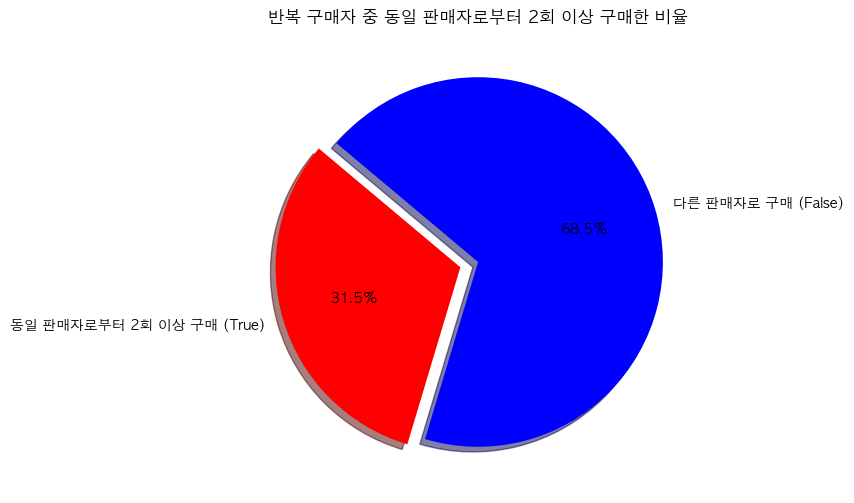

In [198]:
# 1️⃣ 파이차트 (비율 시각화)
labels = ["동일 판매자로부터 2회 이상 구매 (True)", "다른 판매자로 구매 (False)"]
sizes = [repeat_seller_ratio, 100 - repeat_seller_ratio]  # 비율 값
colors = ["red", "blue"]
explode = (0.1, 0)  # True 값을 강조

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct="%1.1f%%", colors=colors, startangle=140, explode=explode, shadow=True)
plt.title("반복 구매자 중 동일 판매자로부터 2회 이상 구매한 비율")
plt.show()

# 가설을 시각화 해보자 [유의미하지 않다]

주문 횟수가 많을 수록 동일 판매자로부터 구매할 가능 성이 높아지는 경향이 있다. [반드시 증가는아님]

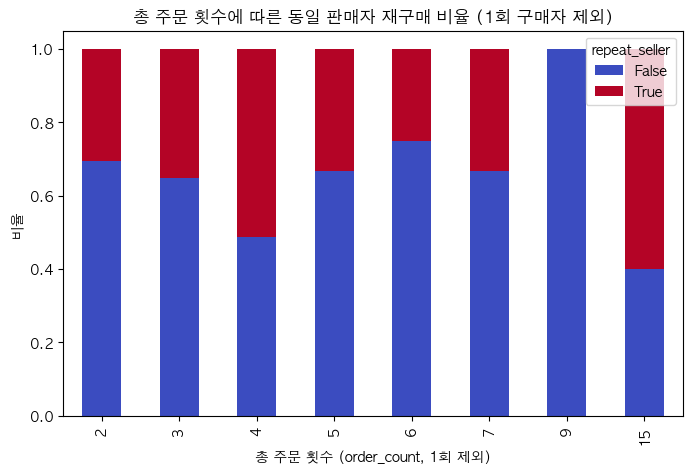

In [199]:
filtered_data = number4_drop[number4_drop["order_count"] > 1]  # 1회 구매자 제외

cross_tab = pd.crosstab(filtered_data["order_count"], filtered_data["repeat_seller"], normalize="index")

cross_tab.plot(kind="bar", stacked=True, figsize=(8, 5), colormap="coolwarm")
plt.xlabel("총 주문 횟수 (order_count, 1회 제외)")
plt.ylabel("비율")
plt.title("총 주문 횟수에 따른 동일 판매자 재구매 비율 (1회 구매자 제외)")
plt.legend(title="repeat_seller", loc="upper right")
plt.show()


## 최종 가설검증 결과

# 1번 가설 : 같은 판매자로부터 2번 구매한 고객은 해당 판매자의 다른 제품(카테고리)에도 관심을 가질 것이다.

가설 검증 결과:  
repeat_seller_count(동일 판매자로부터의 구매 횟수)와 category_count(구매한 카테고리 개수) 간 상관계수 = 0.22 (거의 무관)  

repeat_seller(같은 판매자로부터 구매 여부)와 multi_category_buyer(다양한 카테고리 구매 여부) 간 상관계수 = 0.14 (약한 관계)  

다중 선형 회귀 분석 결과, repeat_seller_count가 증가해도 category_count 변화가 미미함 → 유의미한 관계 없음

결론: 가설은 참이 아니다.

# 2번 가설 : 2번 이상 구매한 고객은 같은 판매자로부터 구매할 확률이 높다.

가설 검증 결과:  
over_2_customers(2번 이상 구매 여부)와 repeat_seller(동일 판매자로부터 2회 이상 구매 여부) 간 상관계수 = 0.548 (중간 정도의 강한 양의 관계)

반복 구매자(2회 이상 구매한 고객) 중 31.5%가 동일 판매자로부터 재구매 → 일정한 패턴 존재

로지스틱 회귀 모델이 완전 분리(Quasi-Separation) 문제 발생 → 특정한 패턴이 너무 뚜렷하여 예측이 거의 100% 가능

결론: 가설은 참이다.


# 회귀분석의 실패 원인  
최종 결론: 왜 실패했는가?

1. 변수 간 상관관계가 약해 회귀 분석이 유의미한 패턴을 찾기 어려웠음.  
2. 완전 분리(Quasi-Separation) 문제로 인해 모델이 불안정해졌을 가능성이 있음.  
3. 결정계수(R²)가 너무 낮아, 회귀 모델의 설명력이 부족했음.  
4. 카테고리 구매 여부(multi_category_buyer)에 영향을 미치는 주요 변수들을 충분히 반영하지 못했음.  

해결 방법 (다음 분석에서 보완할 점)

1. 카테고리 구매에 영향을 미치는 다른 변수(order_count, 구매 주기 등)를 추가 고려
2. 상관관계가 강한 변수를 중심으로 분석하여 회귀 모델의 신뢰성 향상
3. 완전 분리 문제가 발생하는지 체크하고, 필요하면 다른 모델(Logistic Regression 대신 Decision Tree 등) 사용 검토
4. 즉, "가설 자체가 틀렸다고 보기보다는, 기존 모델이 이를 잘 설명하지 못했다"는 것이 핵심! 

In [200]:
number4_drop.to_csv("number4.csv", index=False)